<a href="https://colab.research.google.com/github/aryanfaghihi/ai-course/blob/master/Tabular%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


## Make a copy

**Follow the following steps to make your own copy. You will lose your changes if you don't make your own copy!**

From the tooltip above, you should see 

File | Edit | View | Insert | Runtime | Tools | Help

1. Click on **File**
2. Click on **Save a copy in Drive**

## Import

Let's import the packages we need for today. We will be using [`fastai`](https://www.fast.ai/) to create our AI model. This library makes it easy to get started. As the creators of `fastai` have put it:

> `fastai` - Making neural nets uncool again!



In [ ]:
from fastai.tabular import *
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data

## Setup

As always, the first we will do is to explore the dataset. We will be using the same dataset as before [(`The Adult Dataset`)](https://archive.ics.uci.edu/ml/datasets/adult). Since you are already familiar with the dataset, we will be focusing on more advanced topics today. 

In [ ]:
# Downloading and unzipping the dataset
path = untar_data(URLs.ADULT_SAMPLE)

# Reading the csv dataset
data = pd.read_csv(path/'adult.csv')

Let's remind ourselves of our dataset columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32074 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32049 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


> Side note on `Non-Null Count`
* Notice that most columns do not have any missing values. However some columns such as `occupation` have some missing (null) values
* We will cover how to deal with missing values today

> Side note on `Dtype`
* int64: integer (numerical/continuous)
* float64: decimal (numerical/continuous)
* object: text/string (categorical)

## Plotting

Plotting helps us visualise the datasets much more quickly and make adjustments to our analysis. This is sometimes referred to as **Feature engineering** since we already have some understanding of the dataset and what each number means. 

### Age

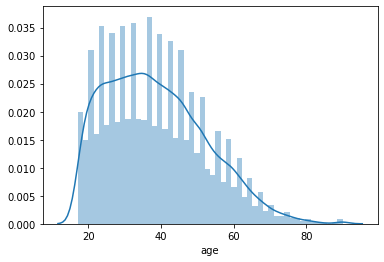

In [ ]:
## plotting a histogram of the age data
sns.distplot(data['age']);

---

⭐  Do you see any issues here?

---

You might notice that the data is **skewed**. This means that our age data is not symmetrical. There are more values between the age group of 20-40 that there are between 50-80. Whenever we see data that does not look symmetrical, we will need to **normalise** our data. One way to do this is to pass the data into a `log` function. Let's see if that works.

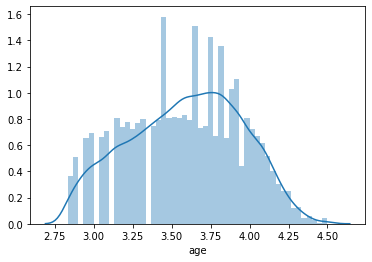

In [ ]:
## attemp to normalise the age data
sns.distplot(log(data['age']));

This looks a lot better! Now our data is more symmetrical than before. There are other ways of normalising data but `log` is used by most Deep Learning engineers whenever **normalisation** is required.

### Workclass

How do we plot a categorical value? We need at least one numeric value. To do so we can convert our `salary` using the following logic
* `salary < 50k = 0`
* `salary >= 50k = 1`

In [ ]:
## Make a copy of the data
data_mod = data.copy() 

## Replacing salary column with 0 and 1 taking 50k is the threshold
data_mod['salary'] = data_mod['salary'].apply(lambda x: 1 if x=='>=50k' else 0)

Ok, now we can plot a categorical plot. You can also call this a bar chart with categories in x axis.

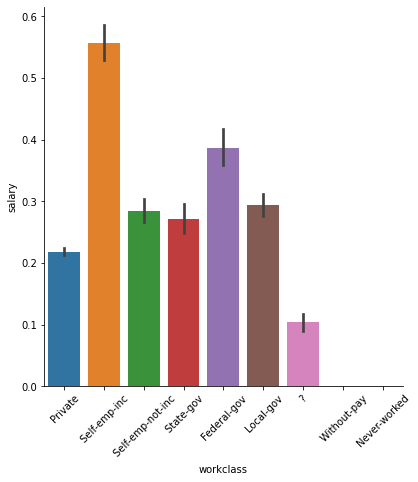

In [ ]:
## Plot the categorical plot
sns.catplot(x="workclass", y="salary", kind='bar', height=6, data=data_mod)

## Rotate the x axis by 45 degree to more easily see the labels
plt.xticks(rotation=45);

This plot shows the variatiob of each `workclass` category in their `salary`. The black line at the top of each bar chart indicates the *variation* in data. The smaller the black line the closer most data points are to the average value.

---

⭐  Can we merge `Without-pay` and `Never-worked` in this case?

---

### Education

---

⭐  Plot a categorical bar chart for `education`

---

In [ ]:
#################
#### YOUR TURN
################
## Fill in the ___ below 
sns.catplot(x=____, y=____, kind=____, height=7, data=data_mod)

## Rotate the x axis by 45 degree to more easily see the labels
plt.xticks(rotation=60);

## Hint: look at the previous section

You should always look at your dataset and see if it makes sense to you. You should always look out for **outliers** and **missing values**. These issues can lead to an inccurate model later when you start training.

### Occupation

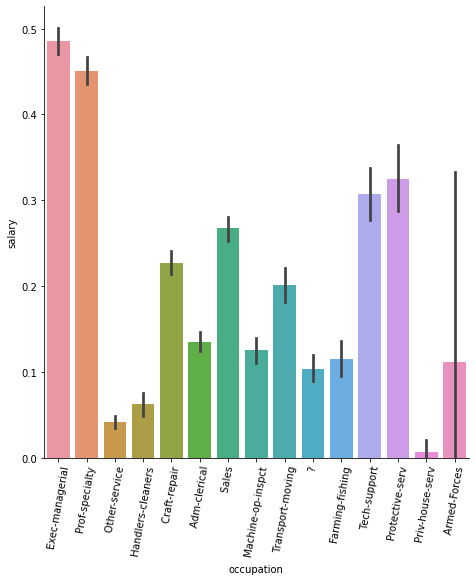

In [ ]:
## Plot the categorical plot
sns.catplot(x="occupation", y="salary", kind='bar', height=7, data=data_mod)

## Rotate the x axis by 45 degree to more easily see the labels
plt.xticks(rotation=80);

Which `occupation` is more likely to have a higher salary? It is probably no surprise that `Exec-managerial` jobs have the highest paid out of all the other options.

---

⭐  Pick a categorical column and apply the same categorical plot

---

In [ ]:
## This list might help you find some other categorical variables
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32074 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32049 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 3.7+ MB


In [ ]:
#################
#### YOUR TURN
################
## Fill in the ___ below 
sns.catplot(x=____, y=____, kind=____, height=____, data=data_mod)

## Rotate the x axis
plt.xticks(rotation=____);

## Hint: look at the sections above

### Multiple Variables

You also have another awesome tool in your toolkit and that is the `pairplot` function. This function will plot all variables against your chosen variable. Here we care about the `salary`. Of course, this might be an overkill for your data and often quite messy if you have a lot of variables like this example. 

When would you use it? It's useful to get a sense of data distribution and spotting outliers. You generally want to spot these issues and then dig deeper using the functions described in the earlier sections such as the `catplot()`.

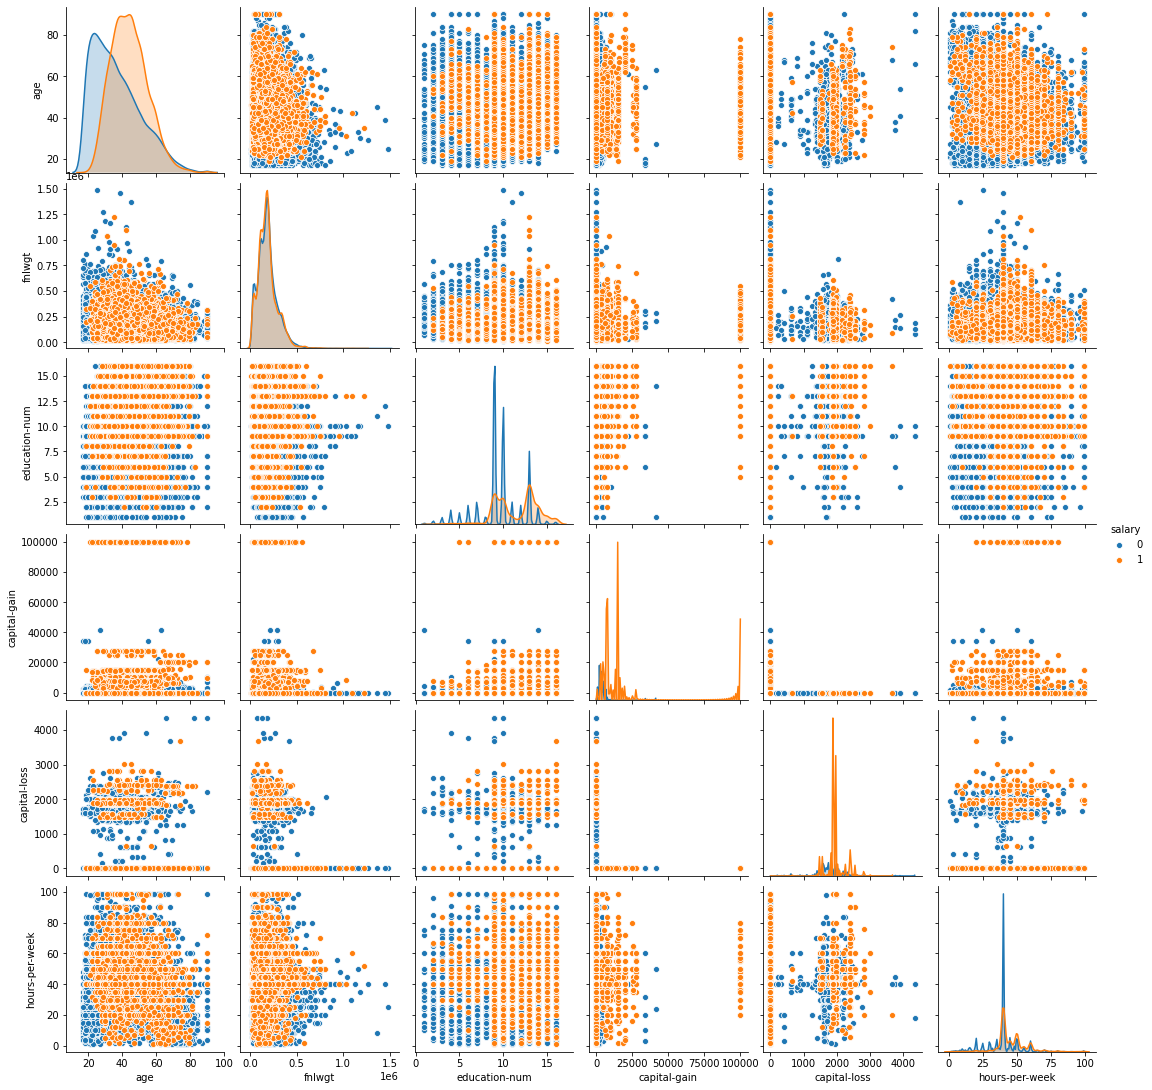

In [ ]:
sns.pairplot(data_mod, hue="salary");

# Model

## Preprocessing

**Preprocessing** is an important step in any Deep Learning task where we try to prepare our dataset for training the model. Notice that in the previous section we noticed some issues with our data and that is precisely why we need preprocessing to fix those problems. Some common preprocessing techniques are: 

* Normalization
* Filling missing values
* Categorization of categorical values

We will dedicate this subsection in exploring what all of these actually mean. This will make it easier for you to create models with higher accuracy.

### Normalization

Previously, we briefly discussed what normalization and how you can use `log` to normalize your data.
> Normalization reduces the spread of data. This helps with generalisation of your model prediction

Let's look at the `age` column of our data again.

---

⭐ use the `head()` method to view column `age` of the data.

---

In [ ]:
## Use the head function to view column head of the data
### YOUR CODE HERE
data['age'].head()


0    49
1    44
2    38
3    38
4    42
Name: age, dtype: int64

In [ ]:
# make a copy of the data
data_norm = data.copy()

# normalise the age column
Normalize([], ['age'])(data_norm)

# view the head of the age column
data_norm['age'].head()

0    0.763785
1    0.397227
2   -0.042641
3   -0.042641
4    0.250604
Name: age, dtype: float64

What changed? 

The `Normalize` function reduced the spread of data. It changed the spread from 20-100 to -3 to 3. This means the following mappings have occured:
* 40 -> 0
* 80 -> 3
* 20 -> -2 
* and so on...'

Why do we do this? Because it helps your model in the traning phase. But why? because continuous variablese can have any value and in any range. Yes, this does not apply to `age` but what about someone's income? this could range from 0 to millions of dollar a year! Having such a large spread of data in a column makes it very difficult to learn anything. However, the smaller the spread for example -3 to 3 is much easier to work with and to learn from.

> In practice, normalization is essential for continuous variables.



---

⭐  Your turn to apply normalization to another continuous column.

---

In [ ]:
## Pick a column with a continous variable and print its head
### YOUR CODE HERE


In [ ]:
## Pick a column with a continous variable and print its head
# make a copy of the data
data_norm = data.copy()

# normalise the your chosen column
### YOUR CODE HERE


# view the head of the your normalized column
### YOUR CODE HERE


# Hint: look at the above example and follow its template

### Missing Values

As you might have noticed, some cells in our dataset contains `NaN` (not a number) or `?` or sometimes it's completely empty (`null`). These are referred to as **missing values**. Dealing with these missing values are extremely important. Because if you don't replace them with anything, that row of data will *not* be used to train your model. Now would you really want to get rid of so many rows of your data just because one value is missing? Someties you do. But most of the time you don't. 


---

⭐  How do we deal with missing values?

---

Let's view the `data` once more but this time notice the missing values (`NaN`)

In [51]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


Notice `education-num` in row `2` is equal to `NaN`.

---

⭐  Print the value of `education-num` in row `2`. 

---

In [54]:
## Use iloc[] to grab row 2 and print the value of column `education-num`
### YOUR CODE HERE
data.iloc[2]['education-num']


nan

Ok, great we found a missing value. What can we do about it? 

There are multiple **strategies** to deal with missing values:
* *MEDIAN*: nans are replaced by the median value of the column (median is found by sorting all column values and then choose the middle one)
* *COMMON*: nans are replaced by the most common value of the column (also known as Mode, this is great for categorical columns)
* *CONSTNAT*: nans are replaced by your chosen value

Which one should you use?

It's very much dependent on your dataset and whichever one would makes the most sense to you. It always helps to try to imagine you are manually trying to predict the output and think about which of these strategies would help you the most in your application. Sometimes it helps to try all of them and see which one works best (like a real scientist!)

Ok, let's try replacing the missing values in the `education-num` column with the `MEDIAN`.

In [60]:
# make a copy of the data
data_fillmiss = data.copy()

# normalise the age column
FillMissing([], ['education-num'], fill_strategy=FillStrategy.MEDIAN)(data_fillmiss)

# view the head of the age column
data_fillmiss['education-num'].head()

0    12.0
1    14.0
2    10.0
3    15.0
4    10.0
Name: education-num, dtype: float64

Notice the value of row 2 changed to `10.0`. 

---

⭐  Try the `COMMON` strategy for filling the missing values for `education-num`.

---

In [ ]:
## Pick a column with a continous variable and print its head
# make a copy of the data
data_fillmiss_v2 = data.copy()

# normalise the your chosen column
### YOUR CODE HERE


# view the head of the your normalized column
### YOUR CODE HERE



# Hint 1: look at the above example and follow its template
# Hint 2: FillStrategy.COMMON might come in handy

---

⭐  Compare the difference between the two strategies.

---

### Categorization

Categorization is the process of replacing category values with numbers. Why? because models only work with number. We can't just input a text into it. We map each category name to a unique value. For example we map:
* `Female` -> 1
* `Male` -> 2
* and so on...

To help us with this process we can use the `Categorify()` method in `fastai`.

Let's select the `head()` of the `sex` column.

In [68]:
data['sex'].head()

0     Female
1       Male
2     Female
3       Male
4     Female
Name: sex, dtype: object

And use a similar process as before to `Categorify` the `sex` column.

In [69]:
# make a copy of the data
data_cat = data.copy()

# normalise the sex column
Categorify(['sex'], [])(data_cat)

# view the head of the sex column
data_cat['sex'].head()

0     Female
1       Male
2     Female
3       Male
4     Female
Name: sex, dtype: category
Categories (2, object): [Female < Male]

But wait, nothing changed? 

If you look closely, you can see that `dtype` changed from `object` to `category`. 

This is enough for `fastai` to internally allocate a unique number for both categories. 

If you're curious about what numbers actually get allocated, you can use `.cat.categories` to get exact index values for each category.

In [70]:
data_cat['sex'].cat.categories

Index([' Female', ' Male'], dtype='object')

Here we can see the mapping:
* 0 -> Female
* 1 -> Male


## Training